In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [23]:
workers_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.1/workers.csv")
crews_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.1/crew.csv")
orders_df = pd.read_csv("C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.1/orders.csv")

In [24]:
merged_df = pd.merge(orders_df, workers_df, how="left", on="worker_id")
merged_df = pd.merge(merged_df, crews_df, how="left", on="crew_id")


In [25]:
# (а) Таблица для каждой бригады сочтены заработанные средства за все время
earnings_by_crew = merged_df.groupby('crew_id')['payment'].sum().reset_index()


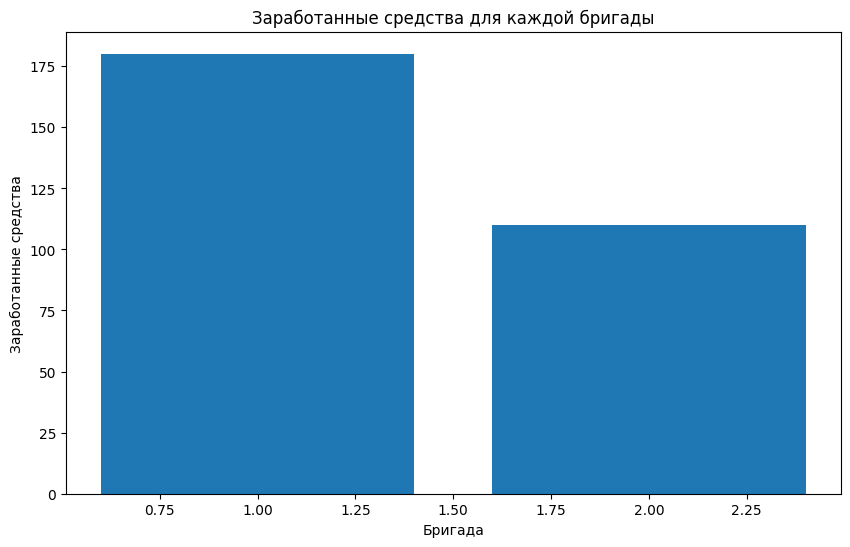

In [26]:
# (б) Диаграмма к предыдущему пункту
plt.figure(figsize=(10, 6))
plt.bar(earnings_by_crew['crew_id'], earnings_by_crew['payment'])
plt.xlabel('Бригада')
plt.ylabel('Заработанные средства')
plt.title('Заработанные средства для каждой бригады')
plt.show()


In [27]:

# (в) Виджеты для выбора периода времени
start_date_widget = widgets.DatePicker(description='Начальная дата', value=pd.to_datetime(merged_df['date'].min()))
end_date_widget = widgets.DatePicker(description='Конечная дата', value=pd.to_datetime(merged_df['date'].max()))
display(start_date_widget, end_date_widget)

# Фильтрация данных по выбранному периоду времени
merged_df['date'] = pd.to_datetime(merged_df['date'])
filtered_df = merged_df[(merged_df['date'] >= start_date_widget.value) & (merged_df['date'] <= end_date_widget.value)]

# Таблица для каждого работника посчитаны средства за производимые им за период времени
earnings_by_worker = filtered_df.groupby('worker_id')['payment'].sum().reset_index()
earnings_by_worker.head()

DatePicker(value=Timestamp('2023-01-05 00:00:00'), description='Начальная дата', step=1)

DatePicker(value=Timestamp('2023-01-18 00:00:00'), description='Конечная дата', step=1)

,worker_id,payment
0,1,100
1,2,110
2,3,80


In [28]:
# (г) Таблица, представляющая заработанные средства на каждой марке автомобилей
earnings_by_car_brand = merged_df.groupby('car_brand')['payment'].sum().reset_index()
earnings_by_car_brand = earnings_by_car_brand.sort_values(by='payment', ascending=False)

earnings_by_car_brand.head()

,car_brand,payment
1,Ford,120
3,Toyota,80
0,Chevrolet,50
2,Honda,40
